# Results

In this notebook I will analyze the data that is logged while training models. Some questions I want to answer:

* How many epochs do I have to run cross validation to determine one model is better than the other?
    * I guess that you have to wait for the model to converge, because convergence speed is variable(eg compare performance after 100 iterations across folds)
* Should I use Log likelihood or AUC for model selection?
    * AUC and log likelihood are just as stable, so I see no reason to prefer log likelihood
* Is a model actually better than another model? - look at Welch t-test. Since I only have mean and variance, I won't be able to use https://github.com/scipy/scipy/blob/v1.1.0/scipy/stats/stats.py#L3970-L4092, I will have to use the 'private' t-test `_ttest_ind_from_stats`, which is in the same file and called by the ttest function.
    * This really seems like overkill for now
* Negative correlations between feature importances(across folds) -> may indicate correlation between features. And no, the variance is not entirely trivial
* Look at variance of model, estimating it by discrepancy between predictions made by models trained on different folds

I should write a module with functions that generate a summary about the model, based on metrics that have been derived on the logs.

In [44]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import json

import os
os.chdir('../src')
%load_ext autoreload
%autoreload 1

%aimport models.lightgbm_model
%aimport features.simple_features
import models.lightgbm_model as lgb_model
import features.simple_features as simple

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CV history

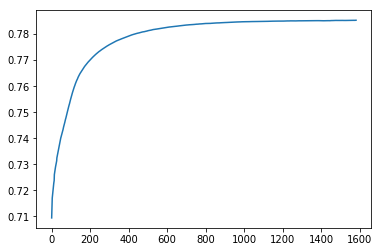

In [8]:
hist = pd.read_hdf('../models/simple_features_no_logloss/cv_history.h5')
plt.plot(hist["auc-mean"])

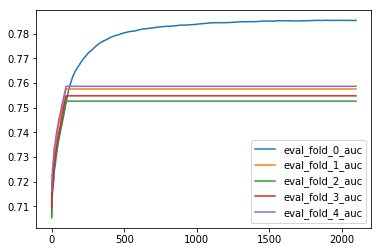

In [19]:
hist = pd.read_hdf('../models/simple_features_correct_cv_no_logloss/cv_history.h5')
for k in hist.keys():
    if k[:5] == 'train':
        hist = hist.drop(k, axis=1)
hist.plot()

In [20]:
hist[-1:]

eval_fold_0_auc  eval_fold_1_auc  eval_fold_2_auc  eval_fold_3_auc  \
2097         0.785353          0.75757         0.752638         0.754774   

      eval_fold_4_auc  
2097         0.758639

In [18]:
hist.iloc[90:110]

eval_fold_0_auc  eval_fold_1_auc  eval_fold_2_auc  eval_fold_3_auc  \
90          0.749139         0.755167         0.750179         0.752229   
91          0.749412         0.755448         0.750437         0.752575   
92          0.749692         0.755710         0.750670         0.752915   
93          0.749926         0.755912         0.750917         0.753166   
94          0.750528         0.756178         0.751272         0.753350   
95          0.750829         0.756379         0.751720         0.753742   
96          0.751127         0.756614         0.751943         0.754101   
97          0.751467         0.756844         0.752111         0.754295   
98          0.751856         0.757438         0.752344         0.754535   
99          0.752098         0.757570         0.752638         0.754774   
100         0.752448         0.757570         0.752638         0.754774   
101         0.752689         0.757570         0.752638         0.754774   
102         0.752959         0.757570         0.752638         0.754774   
103         0.753223         0.757570         0.752638         0.754774   
104         0.753413         0.757570         0.752638         0.754774   
105         0.753917         0.757570         0.752638         0.754774   
106         0.754168         0.757570         0.752638         0.754774   
107         0.754560         0.757570         0.752638         0.754774   
108         0.754747         0.757570         0.752638         0.754774   
109         0.754980         0.757570         0.752638         0.754774   

     eval_fold_4_auc  
90          0.756150  
91          0.756457  
92          0.756641  
93          0.756930  
94          0.757194  
95          0.757535  
96          0.757728  
97          0.758017  
98          0.758142  
99          0.758639  
100         0.758639  
101         0.758639  
102         0.758639  
103         0.758639  
104         0.758639  
105         0.758639  
106         0.758639  
107         0.758639  
108         0.758639  
109         0.758639